# Question 1  - piecewise Lagrangian basis functions

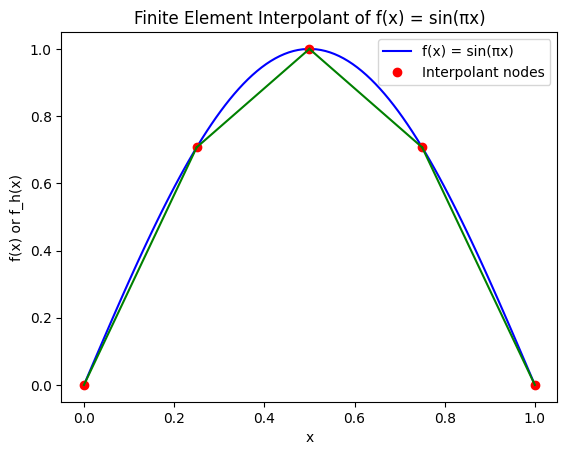

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = sin(pi * x)
def f(x):
    return np.sin(np.pi * x)

# Define mesh points
x_nodes = np.linspace(0, 1, 5)  # 5 nodes from 0 to 1 for a uniform four-element mesh
f_values = f(x_nodes)

# Plot the original function and the finite element interpolant
x = np.linspace(0, 1, 100)
plt.plot(x, f(x), label='f(x) = sin(πx)', color='blue')
plt.plot(x_nodes, f_values, 'o', color='red', label='Interpolant nodes')

# Piecewise linear interpolant
for i in range(len(x_nodes) - 1):
    plt.plot([x_nodes[i], x_nodes[i+1]], [f_values[i], f_values[i+1]], color='green')

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x) or f_h(x)')
plt.title('Finite Element Interpolant of f(x) = sin(πx)')
plt.show()


# Question 2.3 - Galerkin for Sinusoidal Basis functions

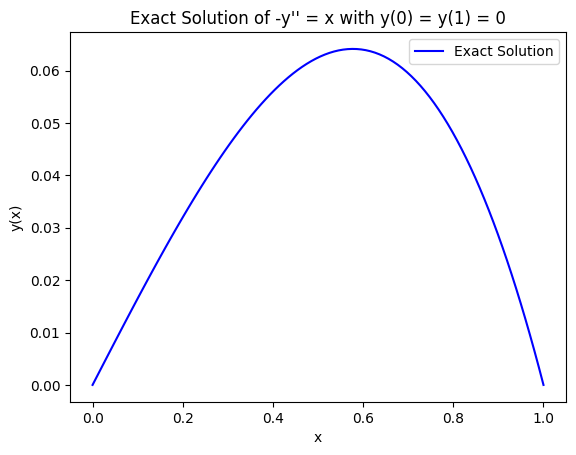

In [92]:
# Define the exact solution
def y_exact(x):
    return -x**3 / 6 + x / 6

# Plot the exact solution
x = np.linspace(0, 1, 100)
plt.plot(x, y_exact(x), label='Exact Solution', color='blue')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Exact Solution of -y\'\' = x with y(0) = y(1) = 0')
plt.legend()
plt.show()


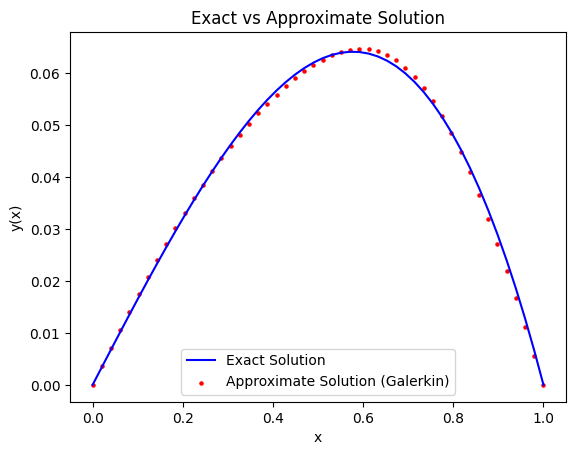

In [180]:
from scipy.integrate import quad

# Basis functions and their derivatives
def phi(i, x):
    return np.sin(i * np.pi * x)

def dphi(i, x):
    return i * np.pi * np.cos(i * np.pi * x)
def K_f_calc(N):
# Define the stiffness matrix K and load vector f

    K = np.zeros((N, N))
    f_vec = np.zeros(N)
    # generally, could use:
    """
    # Calculate K_ij
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            K[i - 1, j - 1] = quad(lambda x: dphi(i, x) * dphi(j, x), 0, 1)[0]

    # Calculate f_i
    for i in range(1, N + 1):
        f_vec[i - 1] = quad(lambda x: x * phi(i, x), 0, 1)[0]
    """
    # simplified version (after calculating by hand)
    K[np.diag_indices(N)] = (np.arange(1, N + 1) ** 2 * (np.pi ** 2)) / 2 # i**2 pi**2 /2

    f_vec = ((-1) ** (np.arange(1, N + 1) + 1)) / (np.pi * np.arange(1, N + 1)) # -1 ** (i + 1) / (i*pi)
    return K, f_vec
N=3
K,f_vec = K_f_calc(3)

# Solve for coefficients c
c = np.linalg.solve(K, f_vec)

# Define the approximate solution yh(x)
def y_approx(x,N,c):
    return sum(c[i - 1] * phi(i, x) for i in range(1, N + 1))

# Plot the exact and approximate solutions
x = np.linspace(0, 1, 50)
plt.plot(x, y_exact(x), label='Exact Solution', color='blue')
plt.scatter(x, [y_approx(xi,N,c) for xi in x], marker  = "o", s = 5,label='Approximate Solution (Galerkin)', color='red')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Exact vs Approximate Solution')
plt.legend()
plt.show()


### Recheck, ignore when grading please
We use more basis functions and check accuracy improvement.

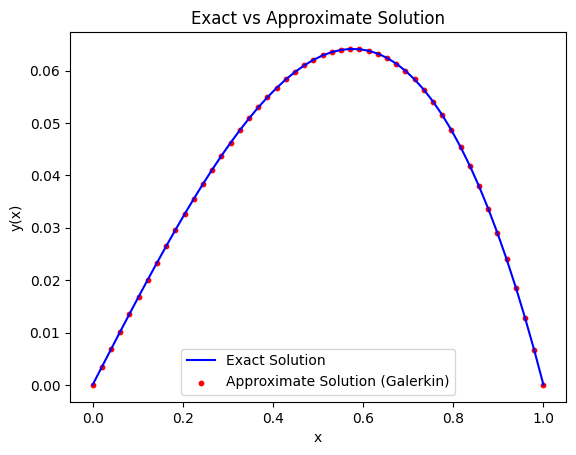

In [182]:
N=40
K,f_vec = K_f_calc(N)

# Solve for coefficients c
c = np.linalg.solve(K, f_vec)
# Plot the exact and approximate solutions
x = np.linspace(0, 1, 50)
plt.plot(x, y_exact(x), label='Exact Solution', color='blue')
plt.scatter(x, [y_approx(xi,N,c) for xi in x], marker  = "o", s = 10,label='Approximate Solution (Galerkin)', color='red')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Exact vs Approximate Solution')
plt.legend()
plt.show()

# 2.4 - Galerkin piece-wise linear finite element

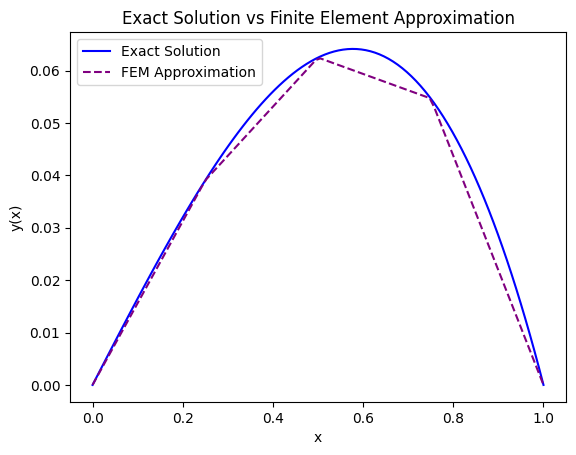

In [172]:
import numpy as np
import matplotlib.pyplot as plt

# Exact solution for reference
def y_exact(x):
    return -x**3 / 6 + x / 6

# Define nodes and elements
x_nodes = np.linspace(0, 1, 5)  # Four elements, mesh size h = 0.25
num_nodes = len(x_nodes)
num_elements = num_nodes - 1

# Define piecewise linear basis functions and their derivatives
def basis_functions(x, i, x_nodes, h):
    if i == 0:
        return (x_nodes[1] - x) / h if x_nodes[0] <= x < x_nodes[1] else 0
    elif i!= len(x_nodes):
        return (x - x_nodes[i-1]) / h if x_nodes[i-1] <= x <= x_nodes[i] else (x_nodes[i+1] - x) / h if x_nodes[i] <= x <= x_nodes[i+1] else 0
    else:
        return (x - x_nodes[i - 1]) / h if x_nodes[i - 1] < x <= x_nodes[i] else 0



# Populate K and f by integration over each element
def K_and_f(num_nodes, x_nodes, h):
    # Compute stiffness matrix K and load vector f
    K = np.zeros((num_nodes, num_nodes))
    f = np.zeros(num_nodes)
    # Fill K and f
    for i in range(1, num_nodes - 1):
        K[i, i] = 2 / h
        K[i, i-1] = -1 / h
        K[i, i+1] = -1 / h
        # f[i] = quad(lambda x: x * basis_functions(x, i, x_nodes,h), 0, 1)[0]# integral x * phi_i
        f[i] = quad(lambda x: x * basis_functions(x, i, x_nodes,h), x_nodes[i - 1], x_nodes[i + 1])[0]
        # t= quad(lambda x: x * basis_functions(x, i, x_nodes,h), 0,1, epsrel=1e-8)[0]

        # assert np.isclose(f[i], t), t# integral x * phi_i)
        # if i ==4:
        #     print("h" , h)
        #     print(x_nodes)
        #     print(quad(lambda x: x * basis_functions(x, i, x_nodes,h), 0, 1)[0])
    # f = np.array([1/96, 1/16, 1/8, 3/16, 11/96]) # this are the manually integrated values (by hand)


    # Apply boundary conditions by modifying K and f
    K = K[1:-1, 1:-1]  # Remove rows/columns for boundary y(0) = y(1) = 0 (we know the coefficients are 0)
    f = f[1:-1]
    return K, f
h = 0.25
K, f = K_and_f(num_nodes, x_nodes, h)
# Solve the linear system K * c = f
c = np.linalg.solve(K, f)

# Approximate solution yh
def y_fem(x, c, num_nodes):
    return sum(c[i-1] * basis_functions(x, i, x_nodes,h) for i in range(1, num_nodes - 1))

# Plot exact and FEM solutions
x = np.linspace(0, 1, 100)
plt.plot(x, y_exact(x), label='Exact Solution', color='blue')
plt.plot(x, [y_fem(xi, c, num_nodes) for xi in x], label='FEM Approximation', color='purple', linestyle='--')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.title('Exact Solution vs Finite Element Approximation')
plt.show()



### Recheck (ignore when grading, please).
We create a finer mesh grid to ensure the FEM is accurate/valid.

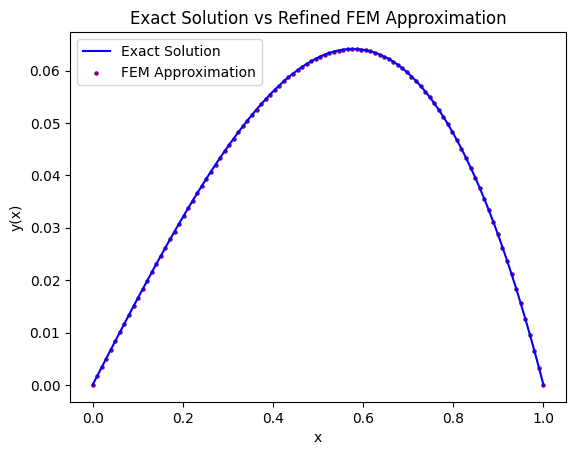

In [160]:

# Define nodes and elements for finer mesh
num_elements = 40
x_nodes = np.linspace(0, 1, num_elements + 1) 
num_nodes = len(x_nodes)


# Assemble stiffness matrix K and load vector f for finer mesh
h = x_nodes[1] - x_nodes[0]
K, f = K_and_f(num_nodes, x_nodes, h)

# Solve for coefficients
c = np.linalg.solve(K, f)


# Plot exact and FEM solutions
x_plot = np.linspace(0, 1, 100)
plt.plot(x_plot, y_exact(x_plot), label='Exact Solution', color='blue')
plt.scatter(x, [y_fem(xi, c, num_nodes) for xi in x], label='FEM Approximation', color='purple', s=5)#, linestyle='-')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.title('Exact Solution vs Refined FEM Approximation')
plt.show()


Note integrating basis functions over entire domain (rather than two adjacent nodes) leads to innacuracy in f vector calculations for extremely fine meshes -- possible numerical unstability? 

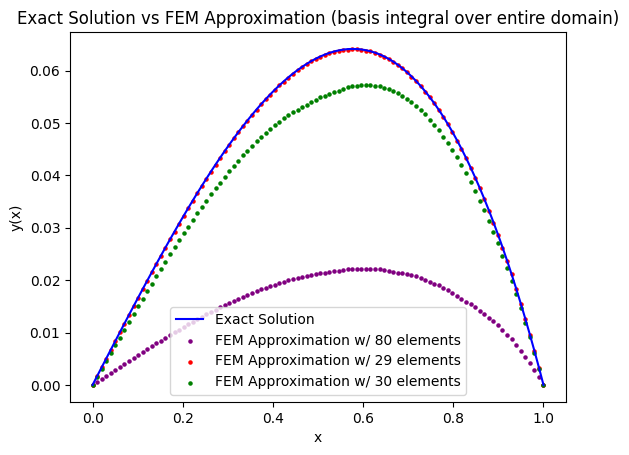

In [171]:
def K_and_f(num_nodes, x_nodes, h):
    # Compute stiffness matrix K and load vector f
    K = np.zeros((num_nodes, num_nodes))
    f = np.zeros(num_nodes)
    # Fill K and f
    for i in range(1, num_nodes - 1):
        K[i, i] = 2 / h
        K[i, i-1] = -1 / h
        K[i, i+1] = -1 / h
        f[i] = quad(lambda x: x * basis_functions(x, i, x_nodes,h), 0, 1)[0]# integral x * phi_i

    # Apply boundary conditions by modifying K and f
    K = K[1:-1, 1:-1]  # Remove rows/columns for boundary y(0) = y(1) = 0 (we know the coefficients are 0)
    f = f[1:-1]
    return K, f

# Define nodes and elements for finer mesh
num_elements = 80
x_nodes = np.linspace(0, 1, num_elements + 1) 
num_nodes = len(x_nodes)


# Assemble stiffness matrix K and load vector f for finer mesh
h = x_nodes[1] - x_nodes[0]
K, f = K_and_f(num_nodes, x_nodes, h)

# Solve for coefficients
c = np.linalg.solve(K, f)


# Plot exact and FEM solutions
x_plot = np.linspace(0, 1, 100)
plt.plot(x_plot, y_exact(x_plot), label='Exact Solution', color='blue')
plt.scatter(x, [y_fem(xi, c, num_nodes) for xi in x], label=f'FEM Approximation w/ {num_elements} elements', color='purple', s=5)#, linestyle='-')

num_elements = 29
x_nodes = np.linspace(0, 1, num_elements + 1) 
num_nodes = len(x_nodes)
# Assemble stiffness matrix K and load vector f for finer mesh
h = x_nodes[1] - x_nodes[0]
K, f = K_and_f(num_nodes, x_nodes, h)
# Solve for coefficients
c = np.linalg.solve(K, f)
plt.scatter(x, [y_fem(xi, c, num_nodes) for xi in x], label=f'FEM Approximation w/ {num_elements} elements', color='red', s=5)#, linestyle='-')

num_elements = 30
x_nodes = np.linspace(0, 1, num_elements + 1) 
num_nodes = len(x_nodes)
# Assemble stiffness matrix K and load vector f for finer mesh
h = x_nodes[1] - x_nodes[0]
K, f = K_and_f(num_nodes, x_nodes, h)
# Solve for coefficients
c = np.linalg.solve(K, f)
plt.scatter(x, [y_fem(xi, c, num_nodes) for xi in x], label=f'FEM Approximation w/ {num_elements} elements', color='green', s=5)#, linestyle='-')

plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.title('Exact Solution vs FEM Approximation (basis integral over entire domain)')
plt.show()


Up to 29 elements in domain, numerical errors are not appearing. 